# **FINAL PROJECT SIRIUS DATA SCIENCE**

## **STAGE PREPARATION**

### **Import Package yang dibutuhkan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder
import seaborn
import plotly.express as px
import os
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, confusion_matrix, fbeta_score
from sklearn.ensemble import RandomForestClassifier

### **Buat koneksi dengan google drive**

### **Membaca File Dataset**

In [2]:
data = pd.read_csv('G:\DATA SCIENTIST\DIGITALSKOLA\FINAL PROJECT\BankChurners.csv', na_values=["Unknown"])
#sekalian mengganti missing value dengan standard value NaN

In [3]:
data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

## **STAGE DATA EXPLORATION & VISUALIZATION**

### **Drop Table yang tidak diperlukan (cari metode lain biar beda)**

In [5]:
data =data.iloc[:,:-2]
data =data.iloc[:,1:]

In [6]:
data

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School            NaN  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123             NaN       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate            NaN     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

### **Liat nilai statistik untuk numerical data**

In [7]:
data.describe(exclude = ['object'])

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

### **Liat nilai statistik untuk categorical data**

In [8]:
data.describe(exclude = ['float', 'int64'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127            8608           9378   
unique                  2      2               6              3   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count             9015         10127  
unique               5             4  
top     Less than $40K          Blue  
freq              3561          9436

In [9]:
data.shape

(10127, 20)

In [10]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [11]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### **Melakukan mapping untuk merubah value categorical menjadi numerical pada feature Attrition_Flag**

In [12]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Customer':1})

### **Melakukan Data Visualisasi distribusi nilai**

#### **Prosentase Customer Activity Status (Attrition Flag)**

In [13]:
pivot_AF = data.pivot_table(columns='Attrition_Flag', aggfunc='count')
pivot_AF

Attrition_Flag               0     1
Avg_Open_To_Buy           8500  1627
Avg_Utilization_Ratio     8500  1627
Card_Category             8500  1627
Contacts_Count_12_mon     8500  1627
Credit_Limit              8500  1627
Customer_Age              8500  1627
Dependent_count           8500  1627
Education_Level           7237  1371
Gender                    8500  1627
Income_Category           7575  1440
Marital_Status            7880  1498
Months_Inactive_12_mon    8500  1627
Months_on_book            8500  1627
Total_Amt_Chng_Q4_Q1      8500  1627
Total_Ct_Chng_Q4_Q1       8500  1627
Total_Relationship_Count  8500  1627
Total_Revolving_Bal       8500  1627
Total_Trans_Amt           8500  1627
Total_Trans_Ct            8500  1627

In [14]:
AF1 = pivot_AF.iloc[0:1,0:4]
AF1

Attrition_Flag      0     1
Avg_Open_To_Buy  8500  1627

In [15]:
AF1.rename(index={'Avg_Open_To_Buy':'Count'}, inplace=True)
AF1

Attrition_Flag     0     1
Count           8500  1627

In [16]:
AF_stat=AF1.iloc[0:1]
AF_count=AF1.iloc[0,0:2]
list(AF_stat)

[0, 1]

In [17]:
status=list(AF_stat)

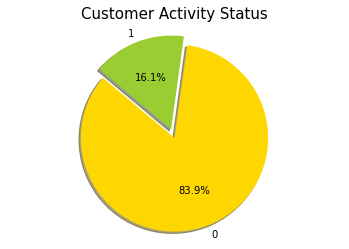

In [18]:
# Data to plot
labels = status
sizes = AF_count
colors = ['gold', 'yellowgreen']
explode = (0, 0.1)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Customer Activity Status', fontsize=15)
plt.axis('equal')
plt.show()

#### **Melakukan Data Visualisasi distribusi feature terhadap Attrition Flag**

In [19]:
continuous_feature = [feature for feature in data.columns]
Colors=['#636EFA']
for feature in continuous_feature:
    fig = px.histogram(data, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()

#### **Melakukan Data Visualisasi distribusi feature terhadap Attrition Flag**

In [20]:
for feature in continuous_feature:
    fig = px.histogram(data, x= feature,title= 'Distribution of '+feature,color="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})
    fig.show()

#### **Korelasi antar features menggunakan visualisasi seaborn heatmap**

<AxesSubplot:>

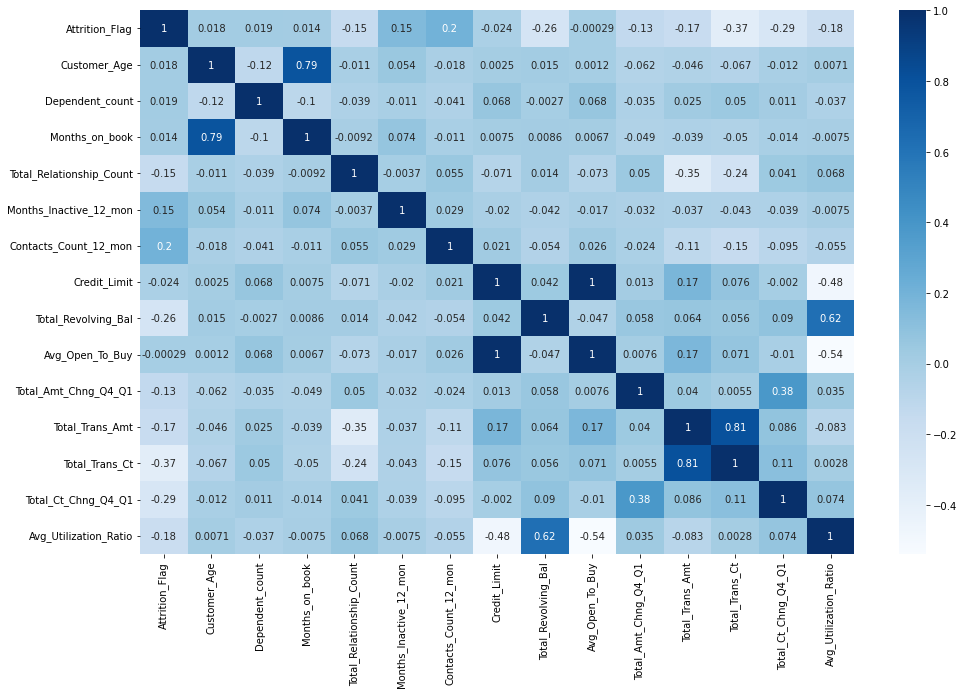

In [21]:
import seaborn as sns
corr = data.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, cmap="Blues",annot=True)

**Menampilkan variabel yang memiliki korelasi lebih dari 0.5**

In [22]:
corr[(corr >= 0.5) & (corr < 1)].unstack()\
.sort_values( ascending=False)\
.drop_duplicates()

Credit_Limit         Avg_Open_To_Buy          0.995981
Total_Trans_Amt      Total_Trans_Ct           0.807192
Customer_Age         Months_on_book           0.788912
Total_Revolving_Bal  Avg_Utilization_Ratio    0.624022
Attrition_Flag       Attrition_Flag                NaN
dtype: float64

**Korelasi antara semua variabel terhadap output Attrition Flag. Tidak ada yang lebih dari 0.5**

In [23]:
cor_target = abs(corr["Attrition_Flag"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Attrition_Flag              1.000000
Total_Relationship_Count    0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Total_Revolving_Bal         0.263053
Total_Amt_Chng_Q4_Q1        0.131063
Total_Trans_Amt             0.168598
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Avg_Utilization_Ratio       0.178410
Name: Attrition_Flag, dtype: float64

In [24]:
print(corr["Attrition_Flag"])

Attrition_Flag              1.000000
Customer_Age                0.018203
Dependent_count             0.018991
Months_on_book              0.013687
Total_Relationship_Count   -0.150005
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
Credit_Limit               -0.023873
Total_Revolving_Bal        -0.263053
Avg_Open_To_Buy            -0.000285
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Trans_Amt            -0.168598
Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Avg_Utilization_Ratio      -0.178410
Name: Attrition_Flag, dtype: float64


## **STAGE DATA PRE-PROCESSING**

### **Cek duplicate value**

In [25]:
data[data.duplicated(keep=False)] #tidak ada data yang terduplikasi

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

### **Missing Value Handling**

**cek nilai unique dari tiap kolom untuk mencari data yang hilang**

In [26]:
datafeature = [datafeat for datafeat in data.columns]
for datafeat in datafeature:
    list_unik = data.loc[:,datafeat].unique()
    print(datafeat,": ",list_unik, '\n')

Attrition_Flag :  [0 1] 

Customer_Age :  [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27] 

Gender :  ['M' 'F'] 

Dependent_count :  [3 5 4 2 0 1] 

Education_Level :  ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate'] 

Marital_Status :  ['Married' 'Single' nan 'Divorced'] 

Income_Category :  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan] 

Card_Category :  ['Blue' 'Gold' 'Silver' 'Platinum'] 

Months_on_book :  [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14] 

Total_Relationship_Count :  [5 6 4 3 2 1] 

Months_Inactive_12_mon :  [1 4 2 3 6 0 5] 

Contacts_Count_12_mon :  [3 2 0 1 4 5 6] 

Credit_Limit :  [12691.  8256.  3418. ...  5409.  5281. 10388.] 

Total_Revolving_Bal :  [ 777  864    0 ...  534  476 2241] 

Avg_Open_To_Buy :  [11914.  7392.  3

**mencari feature yang memiliki nilai NaN**

In [27]:
nan_feat = []
for datafeat in datafeature:
    for i in pd.isna(data.loc[:,datafeat]):
        if i == True:
            nan_feat.append(datafeat)
            break
print(nan_feat)

['Education_Level', 'Marital_Status', 'Income_Category']


**mengganti nilai NaN dengan modus/mode**

In [28]:
for i in nan_feat:
    data[i].fillna(data[i].mode()[0], inplace= True)

**cek apakah masih ada data nan atau tidak**

In [29]:
for i in nan_feat:
    list_nan = data.loc[:,i].unique()
    print(datafeat,": ",list_nan, '\n')

Avg_Utilization_Ratio :  ['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate'] 

Avg_Utilization_Ratio :  ['Married' 'Single' 'Divorced'] 

Avg_Utilization_Ratio :  ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'] 



In [30]:
data.isnull().sum() #sudah tidak ada NaN value

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### **Label Encoding**

**Memisahkan kategori numerical dengan categorical feature**

In [31]:
categorical_col = data.select_dtypes(exclude=['int64','float64']).columns
numerical_col = data.select_dtypes(include=['int64','float64']).columns


In [32]:
print(categorical_col)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


In [33]:
print(numerical_col)

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
le = LabelEncoder()
lb = LabelBinarizer()

1. Melakukan label encoding pada tipe data categorical ordinal menggunakan label encoder
2. Melakukan label encoding pada tipe data categorical nominal menggunakan one hot encoder
3. Melakukan labem encoding pada tipe data boolean menggunakan label binarizer

In [35]:
data_test = data

**'Gender' menggunakan label binarizer**

In [36]:
data_test['Gender_Cat'] = lb.fit_transform(data_test['Gender'])

**'Education_Level' menggunakan label encoder**

In [37]:
data_test['Education_Level_cat'] = le.fit_transform(data_test['Education_Level'])

**'Marital_Status' menggunakan one hot encoder pandas (dummy)**

In [38]:
dum_marital = pd.get_dummies(data_test['Marital_Status'], columns = ['Marital_Status'], prefix='Marital_Status')
data_test = data_test.join(dum_marital)

**'Income_Category' menggunakan label encoder**

In [39]:
data_test['Income_Category_cat'] = le.fit_transform(data_test['Income_Category'])

**'Card_Category'menggunakan one hot encoder**

In [40]:
dum_card = pd.get_dummies(data_test['Card_Category'], columns = ['Card_Category'], prefix='Card_Category')
data_test = data_test.join(dum_card)

In [41]:
data_test.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  ...  Gender_Cat  Education_Level_cat  \
0                         5  ...           1                    3   
1                         6  ...           0                    2   
2                         4  ...           1                    2   
3                         3  ...           0                    3   
4                         5  ...           1                    5   

   Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        0                       1                      0   
1                        0                       0                      1   
2                        0                       1                      0   
3                        0                       1                      0   
4                        0                       1                      0   

   Income_Category_cat  Card_Category_Blue  Card_Category_Gold  \
0                    2                   1                   0   
1                    4                   1                   0   
2                    3                   1                   0   
3                    4                   1                   0   
4                    2                   1                   0   

   Card_Category_Platinum  Card_Category_Silver  
0                       0                     0  
1                       0                     0  
2                       0                     0  
3                       0                     0  
4                       0                     0  

[5 rows x 30 columns]

**Melakukan drop pada features categorical sehingga hanya menyisakan numerical features, dataframe ini kemudian akan dipakai pada section modelling**

In [42]:
data_test.drop(categorical_col, axis =1, inplace= True)

**Export Data ke csv**

In [43]:
##data_test.to_csv('bankchurners_mod.csv', index=True)

In [44]:
data_test 

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0                   0            45                3              39   
1                   0            49                5              44   
2                   0            51                3              36   
3                   0            40                4              34   
4                   0            40                3              21   
...               ...           ...              ...             ...   
10122               0            50                2              40   
10123               1            41                2              25   
10124               1            44                1              36   
10125               1            30                2              36   
10126               1            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  ...  Gender_Cat  Education_Level_cat  \
0              11914.0  ...           1                    3   
1               7392.0  ...           0                    2   
2               3418.0  ...           1                    2   
3                796.0  ...           0                    3   
4               4716.0  ...           1                    5   
...                ...  ...         ...                  ...   
10122           2152.0  ...           1                    2   
10123           2091.0  ...           1                    2   
10124           5409.0  ...           0                    3   
10125           5281.0  ...           1                    2   
10126           8427.0  ...           0                    2   

       Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                            0                       1                      0   
1                            0                       0                      1   
2                            0                       1                      0   
3                            0                       1                      0   
4                            0                       1                      0   
...                        ...                     ...                    ...   
10122                        0                       0                      1   
10123                        1                       0                      0   
10124                        0                       1                      0   
10125                        0                   

## **STAGE MODELING**

### **Membagi data train dan data test**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = data_test[data_test.columns[1:]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = data_test['Attrition_Flag']

In [47]:
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [48]:
#X.to_csv('bankchurners_train.csv', index=True)

### **Cek proporsi antara kelas 0 dan kelas 1 pada y_train dan y_test**

**Persentase churn pada test data set**

In [49]:
test=y_test.value_counts()
n1 = y_test.value_counts()[1]
n0 = y_test.value_counts()[0]
persentase_t = n1/(n1+n0)*100
persentase_t

16.140177690029613

**Persentase churn pada train data set**

In [50]:
train=y_train.value_counts()
n1 = y_train.value_counts()[1]
n0 = y_train.value_counts()[0]
persentase_tr = n1/(n1+n0)*100
persentase_tr

16.047401555363535

### **CLASSIFICATION**

#### **Import packages**

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score

from sklearn.model_selection import cross_val_score


In [52]:
#result function

def pred_result(y_pred):
    print("=================================")
    print("=       MODEL TEST RESULT       =")
    print("=================================")

    predictions = [round(value) for value in y_pred]
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f2_score = fbeta_score(y_test, predictions, beta=2)
    accuracy = accuracy_score(y_test,predictions)
    confusion_matrix(y_test, predictions, labels=[1,0])

    tp, fn, fp, tn = confusion_matrix(y_test,predictions,labels=[1,0]).reshape(-1)

    print("accuracy: %.2f%%" % (accuracy * 100))
    print("precision: %.2f%%" % (precision * 100))
    print("recall: %.2f%%" % (recall * 100))
    print("f2-score : %.2f%%" % (f2_score * 100))
    print('confusion matrix :\n', 'TP:', tp, ' FN:', fn, ' FP:', fp, ' TN:', tn)
    print("=================================")

#### **Model: Random Forest** #1

In [53]:
#define model
clf_rf = RandomForestClassifier(random_state=10) 

In [132]:
pred_result(y_pred_rf)

=       MODEL TEST RESULT       =
accuracy: 94.77%
precision: 92.02%
recall: 74.01%
f2-score : 77.02%
confusion matrix :
 TP: 242  FN: 85  FP: 21  TN: 1678


In [54]:
#fit model
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [55]:
# Predict the Test Result
y_pred_rf =clf_rf.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print(acc_rf)

0.947680157946693


In [56]:
#model score
clf_rf.score(X_train, y_train)

1.0

In [57]:
#model confusion matrix
confusion_matrix(y_test, y_pred_rf)

array([[1678,   21],
       [  85,  242]], dtype=int64)

In [58]:
#model classification report
cr_rf =classification_report(y_test, y_pred_rf)
print(cr_rf)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1699
           1       0.92      0.74      0.82       327

    accuracy                           0.95      2026
   macro avg       0.94      0.86      0.89      2026
weighted avg       0.95      0.95      0.95      2026



In [59]:
#model f2 score
fbeta_score(y_test, y_pred_rf, beta=2)

0.7702100572883511

#### **Model: Decision Tree** #2 

In [60]:
#define model
clf_dt = DecisionTreeClassifier(max_depth=30, random_state=21)

In [133]:
pred_result(y_pred_dt)

=       MODEL TEST RESULT       =
accuracy: 93.29%
precision: 80.51%
recall: 77.06%
f2-score : 77.73%
confusion matrix :
 TP: 252  FN: 75  FP: 61  TN: 1638


In [61]:
#fit mode
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=21)

In [62]:
# Predict the Test Result
y_pred_dt= clf_dt.predict(X_test)
acc_dc = accuracy_score(y_test,y_pred_dt)
print(acc_dc)

0.932872655478776


In [63]:
#model score
clf_dt.score(X_train, y_train)

1.0

In [64]:
#model confusion matrix
confusion_matrix(y_test, y_pred_dt)

array([[1638,   61],
       [  75,  252]], dtype=int64)

In [65]:
#model classification report
cr_dt =classification_report(y_test, y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1699
           1       0.81      0.77      0.79       327

    accuracy                           0.93      2026
   macro avg       0.88      0.87      0.87      2026
weighted avg       0.93      0.93      0.93      2026



In [66]:
#model f2 score
fbeta_score(y_test, y_pred_dt, beta=2)

0.7772979642196176

##### **Decision Tree Visualization**

#### **Model: XGBoost** #3

In [67]:
#define model
clf_xgbc = XGBClassifier(random_state=11)

In [134]:
pred_result(y_pred_xgbc)

=       MODEL TEST RESULT       =
accuracy: 96.54%
precision: 91.32%
recall: 86.85%
f2-score : 87.71%
confusion matrix :
 TP: 284  FN: 43  FP: 27  TN: 1672


In [68]:
#fit mode
clf_xgbc.fit(X_train, y_train)

c:\Users\Dean\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[20:20:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
# Predict the Test Result
y_pred_xgbc =clf_xgbc.predict(X_test)
acc_xgbc = accuracy_score(y_test,y_pred_xgbc)
print(acc_xgbc)

0.9654491609081934


In [70]:
#model score
clf_xgbc.score(X_train, y_train)

1.0

In [71]:
#model confusion matrix
confusion_matrix(y_test, y_pred_xgbc)

array([[1672,   27],
       [  43,  284]], dtype=int64)

In [72]:
#model classification report
cr_xgbc =classification_report(y_test, y_pred_xgbc)
print(cr_xgbc)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1699
           1       0.91      0.87      0.89       327

    accuracy                           0.97      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.97      0.97      2026



In [73]:
#model f2 score
fbeta_score(y_test, y_pred_xgbc, beta=2)

0.8770846201358864

## **STAGE MODEL EXPLAINABILITY**

### **Features Importance**

In [74]:
best_feature = pd.DataFrame({'Atribut' : X_train.columns, 'Importance' : clf_xgbc.feature_importances_})

In [75]:
best_feature.sort_values(by='Importance', ascending=False)

Atribut  Importance
11            Total_Trans_Ct    0.242347
7        Total_Revolving_Bal    0.174459
3   Total_Relationship_Count    0.125502
10           Total_Trans_Amt    0.062154
12       Total_Ct_Chng_Q4_Q1    0.050419
4     Months_Inactive_12_mon    0.047923
0               Customer_Age    0.040723
9       Total_Amt_Chng_Q4_Q1    0.033033
14                Gender_Cat    0.032589
5      Contacts_Count_12_mon    0.031202
13     Avg_Utilization_Ratio    0.021915
6               Credit_Limit    0.021881
17    Marital_Status_Married    0.021328
8            Avg_Open_To_Buy    0.019985
2             Months_on_book    0.012651
1            Dependent_count    0.012248
20        Card_Category_Blue    0.011972
16   Marital_Status_Divorced    0.011199
15       Education_Level_cat    0.011108
19       Income_Category_cat    0.006032
18     Marital_Status_Single    0.005426
23      Card_Category_Silver    0.003902
21        Card_Category_Gold    0.000000
22    Card_Category_Platinum    0.000000

### **SHAP Value**

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


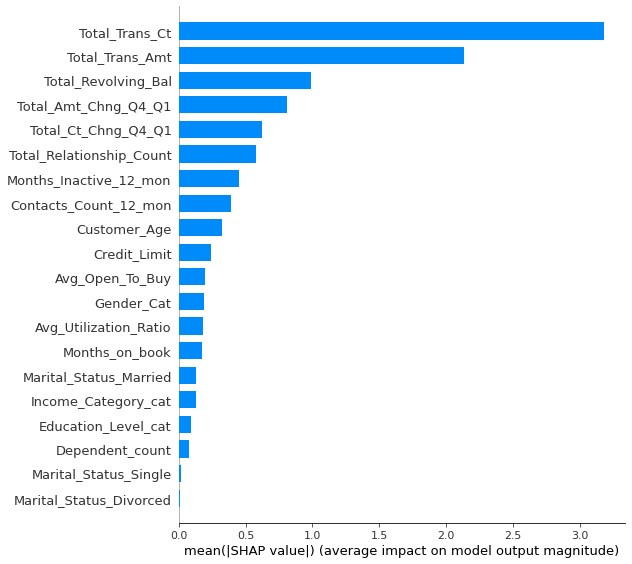

In [76]:
import shap
shap_values = shap.TreeExplainer(clf_xgbc).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

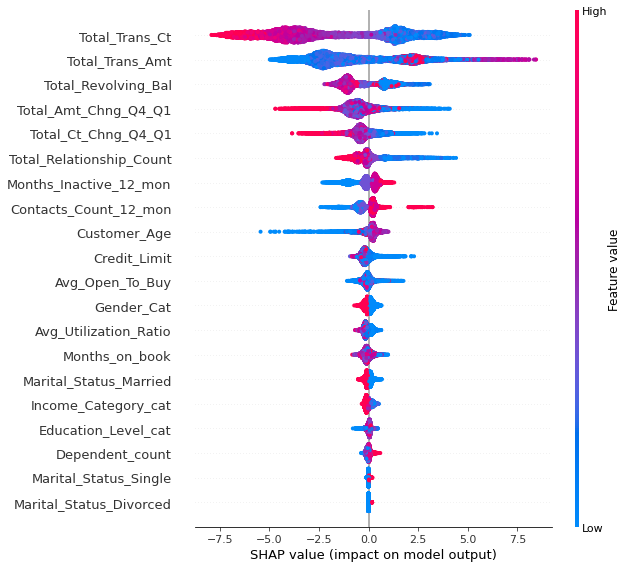

In [77]:
f = plt.figure()
shap.summary_plot(shap_values, X)

## **STAGE HYPEPARAMETER TUNING**

### **import packages**

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

### **Random Forest**

#### **Tuning Menggunakan Gridsearch**

In [123]:
grid_search_rf_g = GridSearchCV(clf_rf, {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1
                           )
grid_search_rf_g.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='recall', verbose=1)

In [124]:
grid_search_rf_g.best_params_

{'max_features': 0.5500000000000002, 'n_estimators': 45}

In [125]:
grid_search_rf_g.best_score_

0.8684615384615384

#### **Tuning Menggunakan RandomizedSearch**

In [128]:
random_search_rf_r = RandomizedSearchCV(clf_rf,
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search_rf_r.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, scoring='recall', verbose=1)

In [129]:
random_search_rf_r.best_params_

{'n_estimators': 45, 'max_features': 0.5500000000000002}

In [130]:
random_search_rf_r.best_score_

0.8684615384615384

#### **Tuned model**

In [83]:
#define model
clf_rf_tuned = RandomForestClassifier(n_estimators=int(random_search_rf.best_params_.get('n_estimators')),
                                      max_features=float(random_search_rf.best_params_.get('max_features')),
                                      random_state=3) 

In [84]:
#fit model
clf_rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_features=0.5500000000000002, n_estimators=45,
                       random_state=3)

In [85]:
# Predict the Test Result
y_pred_rf_tuned =clf_rf.predict(X_test)

In [86]:
#model score
clf_rf_tuned.score(X_train, y_train)

0.9997531168991483

In [138]:
cr_rf_tuned = classification_report(y_test,y_pred_rf_tuned)
print(cr_rf_tuned)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1699
           1       0.92      0.74      0.82       327

    accuracy                           0.95      2026
   macro avg       0.94      0.86      0.89      2026
weighted avg       0.95      0.95      0.95      2026



In [87]:
pred_result(y_pred_rf_tuned)

=       MODEL TEST RESULT       =
accuracy: 94.77%
precision: 92.02%
recall: 74.01%
f2-score : 77.02%
confusion matrix :
 TP: 242  FN: 85  FP: 21  TN: 1678


### **Decision Tree**

#### **Tuning Menggunakan Gridsearch**

In [ ]:
grid_search_dt_g = GridSearchCV(clf_dt, {
                               'max_depth': [2, 3, 5, 10, 20],
                               'min_samples_leaf': [5, 10, 20, 50, 100],
                               'criterion': ["gini", "entropy"],
                            
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1
                           )
grid_search_dt_g.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=30, random_state=21),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

In [ ]:
grid_search_dt_g.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}

In [ ]:
grid_search_dt_g.best_score_

0.8046153846153846

#### **Tuning Menggunakan RandomizedSearch**

In [ ]:
random_search_dt_r = RandomizedSearchCV(clf_dt, {
                               'max_depth': [2, 3, 5, 10, 20],
                               'min_samples_leaf': [5, 10, 20, 50, 100],
                               'criterion': ["gini", "entropy"],
                            
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1
                           )
random_search_dt_r.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=30,
                                                    random_state=21),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100]},
                   scoring='recall', verbose=1)

In [ ]:
random_search_dt_r.best_params_

{'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini'}

In [ ]:
random_search_dt_r.best_score_

0.7869230769230768

#### **Tuned model**

In [91]:
#define model
clf_dt_tuned = DecisionTreeClassifier(min_samples_leaf= random_search_dt.best_params_.get('min_samples_leaf'),
                                      max_depth= random_search_dt.best_params_.get('max_depth'),
                                      criterion= random_search_dt.best_params_.get('criterion'),
                                      random_state=21)

In [92]:
#fit mode
clf_dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10, random_state=21)

In [93]:
# Predict the Test Result
y_pred_dt_tuned= clf_dt.predict(X_test)


In [94]:
#model score
clf_dt_tuned.score(X_train, y_train)

0.9644488334773484

In [95]:
pred_result(y_pred_dt_tuned)

=       MODEL TEST RESULT       =
accuracy: 93.29%
precision: 80.51%
recall: 77.06%
f2-score : 77.73%
confusion matrix :
 TP: 252  FN: 75  FP: 61  TN: 1638


### **XGBoost**

#### **Tuning Menggunakan Gridsearch**

In [117]:
grid_search_xgbc_g = GridSearchCV(clf_xgbc, {
                               'max_depth': [2, 3, 5, 10, 20],
                              'booster': ["gbtree", "gblinear","dart"],
                            
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1
                           )
grid_search_xgbc_g.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:33:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=11, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
          

In [118]:
grid_search_xgbc_g.best_params_

{'booster': 'gbtree', 'max_depth': 3}

In [119]:
grid_search_xgbc_g.best_score_

0.8992307692307693

#### **Tuning Menggunakan RandomizedSearch**

In [120]:
random_search_xgbc_r = RandomizedSearchCV(clf_xgbc,
                           {
                              'max_depth': [2, 3, 5, 10, 20],
                              'booster': ["gbtree", "gblinear","dart"],
                            },cv=5, scoring="recall",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 2
                           )
random_search_xgbc_r.fit(X_train,y_train)

The total space of parameters 15 is smaller than n_iter=50. Running 15 iterations. For exhaustive searches, use GridSearchCV.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:34:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=8,
                                           num_parallel_tree=1,
                                           predictor='auto

In [121]:
random_search_xgbc_r.best_params_

{'max_depth': 3, 'booster': 'gbtree'}

In [122]:
random_search_xgbc_r.best_score_

0.8992307692307693

#### **Tuned model**

In [99]:
#define model
clf_xgbc_tuned = XGBClassifier(max_depth=random_search_xgbc.best_params_.get('max_depth'),
                               booster=random_search_xgbc.best_params_.get('booster'),
                               random_state=11)

In [100]:
#fit model
eval_set = [(X_train, y_train), (X_test, y_test)]
clf_xgbc_tuned.fit(X_train, y_train, 
                    eval_metric=["aucpr"], 
                    eval_set=eval_set, 
                    verbose=True, 
                    early_stopping_rounds=5)

[0]	validation_0-aucpr:0.74248	validation_1-aucpr:0.72464
[1]	validation_0-aucpr:0.78666	validation_1-aucpr:0.76623
[2]	validation_0-aucpr:0.84700	validation_1-aucpr:0.82291
[3]	validation_0-aucpr:0.87559	validation_1-aucpr:0.84029
[4]	validation_0-aucpr:0.88408	validation_1-aucpr:0.85636
[5]	validation_0-aucpr:0.89460	validation_1-aucpr:0.86660
[6]	validation_0-aucpr:0.89884	validation_1-aucpr:0.87319
[7]	validation_0-aucpr:0.91355	validation_1-aucpr:0.88406
[8]	validation_0-aucpr:0.92035	validation_1-aucpr:0.89783
[9]	validation_0-aucpr:0.92689	validation_1-aucpr:0.90642
[10]	validation_0-aucpr:0.93489	validation_1-aucpr:0.91359
[11]	validation_0-aucpr:0.94393	validation_1-aucpr:0.92558
[12]	validation_0-aucpr:0.94721	validation_1-aucpr:0.92901
[13]	validation_0-aucpr:0.95060	validation_1-aucpr:0.93291
[14]	validation_0-aucpr:0.95682	validation_1-aucpr:0.93958
[15]	validation_0-aucpr:0.95908	validation_1-aucpr:0.94089
[16]	validation_0-aucpr:0.96062	validation_1-aucpr:0.94313
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
# Predict the Test Result
y_pred_xgbc_tuned =clf_xgbc_tuned.predict(X_test)

In [102]:
#model score
clf_xgbc_tuned.score(X_train, y_train)

0.9816072089865449

In [103]:
#prediction result
pred_result(y_pred_xgbc_tuned)

=       MODEL TEST RESULT       =
accuracy: 96.84%
precision: 93.40%
recall: 86.54%
f2-score : 87.83%
confusion matrix :
 TP: 283  FN: 44  FP: 20  TN: 1679


**Validasi AUCPR**

In [104]:
results = clf_xgbc_tuned.evals_result()
epochs = len(results['validation_0']['aucpr'])
x_axis = range(0, epochs)

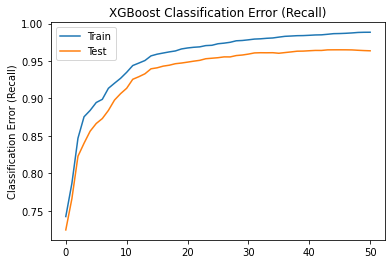

In [105]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['aucpr'], label='Train')
ax.plot(x_axis, results['validation_1']['aucpr'], label='Test')
ax.legend()
plt.ylabel('Classification Error (Recall)')
plt.title('XGBoost Classification Error (Recall)')
plt.show()

## **STAGE MODEL DEPLOYMENT**

### **Pickle Creation**

In [106]:
# Tuned XGBoost Model dipilih sebagai model yang akan dideploy
!pip install pickle-mixin
import pickle

In [107]:
#save model 
filename = 'trained_model_rev.pkl'
pickle.dump(clf_xgbc_tuned,open(filename, 'wb'))